In [1]:
'''
We are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.
'''

'\nWe are learning how to use LSTM to do forecasting. Follow the code and explain it when it is needed.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display

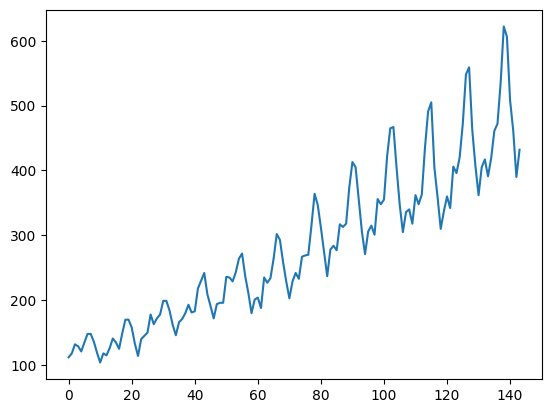

In [2]:
#load the dataset

training_set = pd.read_csv('airline-passengers.csv')

training_set = training_set.iloc[:,1:2].values

plt.plot(training_set, label = 'Airlines Data')
plt.show()

In [9]:
'''
***Explain*** What is the sliding_windows function doing here?, and what does the seq_length value mean?
'''

seq_length = 5

def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)



sc = MinMaxScaler()
display(training_set.shape)
training_data = sc.fit_transform(training_set)

x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

(144, 1)

## Model

In [4]:
'''
LSTM Network
'''

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        '''
        ***Explain*** Why do we need h_0 and c_0?
        '''
        
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

## Training

In [5]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

'''
***Explain*** Why are the input size and the num_classes equal to one?, should not it be input_size = seq_length? 
'''

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# for np in lstm.parameters():
#     print(np)

In [8]:
criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

def train(crit: torch.nn.MSELoss , optim: torch.optim.Adam, model: LSTM, n_epochs: int):
  # Train the model
  for epoch in range(n_epochs):
      outputs = model(trainX)
      optim.zero_grad()
      
      # obtain the loss function
      loss = crit(outputs, trainY)
      loss.backward()
      optimizer.step()
      if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

train(criterion, optimizer, lstm, num_epochs)

Epoch: 0, loss: 0.00111
Epoch: 100, loss: 0.00111
Epoch: 200, loss: 0.00111
Epoch: 300, loss: 0.00111
Epoch: 400, loss: 0.00111
Epoch: 500, loss: 0.00110
Epoch: 600, loss: 0.00110
Epoch: 700, loss: 0.00110
Epoch: 800, loss: 0.00110
Epoch: 900, loss: 0.00110
Epoch: 1000, loss: 0.00109
Epoch: 1100, loss: 0.00109
Epoch: 1200, loss: 0.00109
Epoch: 1300, loss: 0.00108
Epoch: 1400, loss: 0.00108
Epoch: 1500, loss: 0.00107
Epoch: 1600, loss: 0.00105
Epoch: 1700, loss: 0.00104
Epoch: 1800, loss: 0.00102
Epoch: 1900, loss: 0.00101


## Testing for Airplane Passengers Dataset

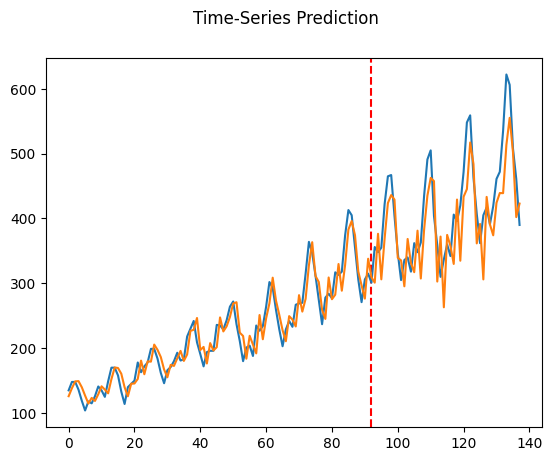

In [8]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

Epoch: 0, loss: 0.00156
Epoch: 100, loss: 0.00155
Epoch: 200, loss: 0.00155
Epoch: 300, loss: 0.00154
Epoch: 400, loss: 0.00154
Epoch: 500, loss: 0.00153
Epoch: 600, loss: 0.00153
Epoch: 700, loss: 0.00152
Epoch: 800, loss: 0.00152
Epoch: 900, loss: 0.00151
Epoch: 1000, loss: 0.00151
Epoch: 1100, loss: 0.00150
Epoch: 1200, loss: 0.00149
Epoch: 1300, loss: 0.00148
Epoch: 1400, loss: 0.00146
Epoch: 1500, loss: 0.00144
Epoch: 1600, loss: 0.00141
Epoch: 1700, loss: 0.00139
Epoch: 1800, loss: 0.00135
Epoch: 1900, loss: 0.00131
Epoch: 2000, loss: 0.00126
Epoch: 2100, loss: 0.00122
Epoch: 2200, loss: 0.00121
Epoch: 2300, loss: 0.00119
Epoch: 2400, loss: 0.00118
Epoch: 2500, loss: 0.00117
Epoch: 2600, loss: 0.00117
Epoch: 2700, loss: 0.00116
Epoch: 2800, loss: 0.00116
Epoch: 2900, loss: 0.00115
Epoch: 3000, loss: 0.00114
Epoch: 3100, loss: 0.00114
Epoch: 3200, loss: 0.00113
Epoch: 3300, loss: 0.00112
Epoch: 3400, loss: 0.00112
Epoch: 3500, loss: 0.00111
Epoch: 3600, loss: 0.00111
Epoch: 3700, 

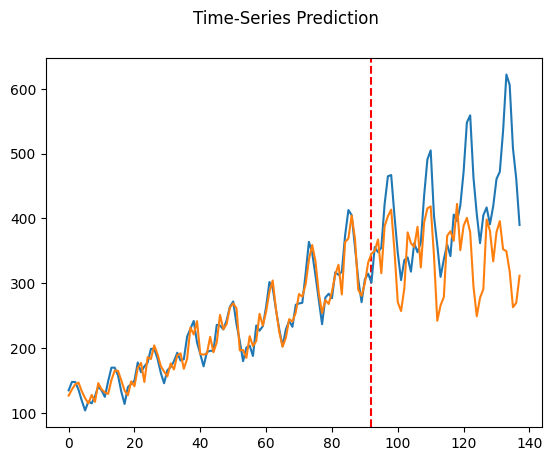

In [9]:
'''
***Explain Rerun*** your model with 5000 epochs. Do you notice something strange? If yes, provide an explanation.
'''
train(criterion, optimizer, lstm, 5000)
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

#Plot the Predictions
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [10]:
'''
Implement MSE calculation for the test data
'''
loss = criterion(lstm(testX), testY)
print("MSE: %1.5f" % loss.item())

MSE: 0.04251


seq_length: 10, hidden_size: 4
Epoch: 0, loss: 0.05264
Epoch: 100, loss: 0.00406
Epoch: 200, loss: 0.00291
Epoch: 300, loss: 0.00211
Epoch: 400, loss: 0.00179
Epoch: 500, loss: 0.00167
Epoch: 600, loss: 0.00162
Epoch: 700, loss: 0.00160
Epoch: 800, loss: 0.00160
Epoch: 900, loss: 0.00156
Epoch: 1000, loss: 0.00155
Epoch: 1100, loss: 0.00161
Epoch: 1200, loss: 0.00150
Epoch: 1300, loss: 0.00156
Epoch: 1400, loss: 0.00142
Epoch: 1500, loss: 0.00134
Epoch: 1600, loss: 0.00135
Epoch: 1700, loss: 0.00131
Epoch: 1800, loss: 0.00130
Epoch: 1900, loss: 0.00129
MSE: 0.00857


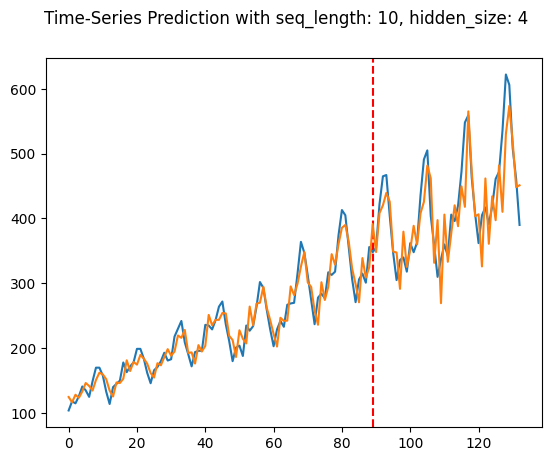

seq_length: 10, hidden_size: 8
Epoch: 0, loss: 0.02236
Epoch: 100, loss: 0.00244
Epoch: 200, loss: 0.00165
Epoch: 300, loss: 0.00146
Epoch: 400, loss: 0.00141
Epoch: 500, loss: 0.00145
Epoch: 600, loss: 0.00126
Epoch: 700, loss: 0.00119
Epoch: 800, loss: 0.00094
Epoch: 900, loss: 0.00077
Epoch: 1000, loss: 0.00085
Epoch: 1100, loss: 0.00061
Epoch: 1200, loss: 0.00044
Epoch: 1300, loss: 0.00040
Epoch: 1400, loss: 0.00039
Epoch: 1500, loss: 0.00037
Epoch: 1600, loss: 0.00034
Epoch: 1700, loss: 0.00031
Epoch: 1800, loss: 0.00044
Epoch: 1900, loss: 0.00028
MSE: 0.00538


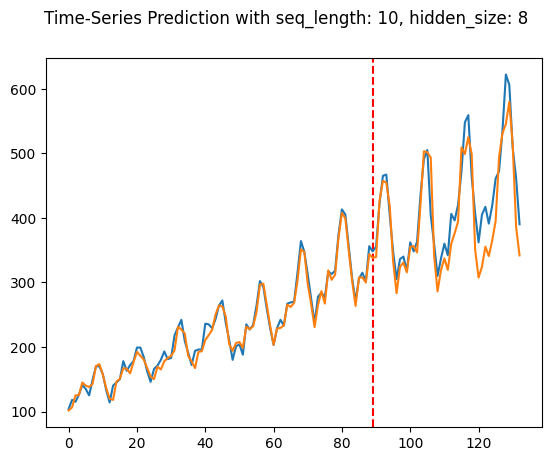

seq_length: 10, hidden_size: 16
Epoch: 0, loss: 0.15521
Epoch: 100, loss: 0.00360
Epoch: 200, loss: 0.00286
Epoch: 300, loss: 0.00179
Epoch: 400, loss: 0.00161
Epoch: 500, loss: 0.00141
Epoch: 600, loss: 0.00128
Epoch: 700, loss: 0.00148
Epoch: 800, loss: 0.00121
Epoch: 900, loss: 0.00103
Epoch: 1000, loss: 0.00150
Epoch: 1100, loss: 0.00086
Epoch: 1200, loss: 0.00055
Epoch: 1300, loss: 0.00042
Epoch: 1400, loss: 0.00053
Epoch: 1500, loss: 0.00032
Epoch: 1600, loss: 0.00031
Epoch: 1700, loss: 0.00028
Epoch: 1800, loss: 0.00020
Epoch: 1900, loss: 0.00018
MSE: 0.00821


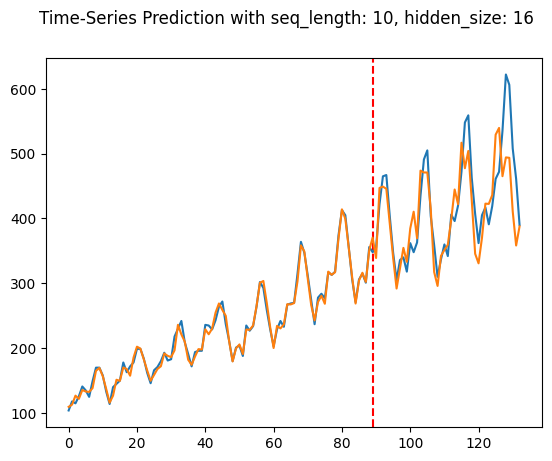

seq_length: 10, hidden_size: 32
Epoch: 0, loss: 0.21936
Epoch: 100, loss: 0.00368
Epoch: 200, loss: 0.00287
Epoch: 300, loss: 0.00172
Epoch: 400, loss: 0.00189
Epoch: 500, loss: 0.00165
Epoch: 600, loss: 0.00172
Epoch: 700, loss: 0.00137
Epoch: 800, loss: 0.00117
Epoch: 900, loss: 0.00222
Epoch: 1000, loss: 0.00052
Epoch: 1100, loss: 0.00044
Epoch: 1200, loss: 0.00038
Epoch: 1300, loss: 0.00035
Epoch: 1400, loss: 0.00037
Epoch: 1500, loss: 0.00023
Epoch: 1600, loss: 0.00033
Epoch: 1700, loss: 0.00017
Epoch: 1800, loss: 0.00014
Epoch: 1900, loss: 0.00010
MSE: 0.00665


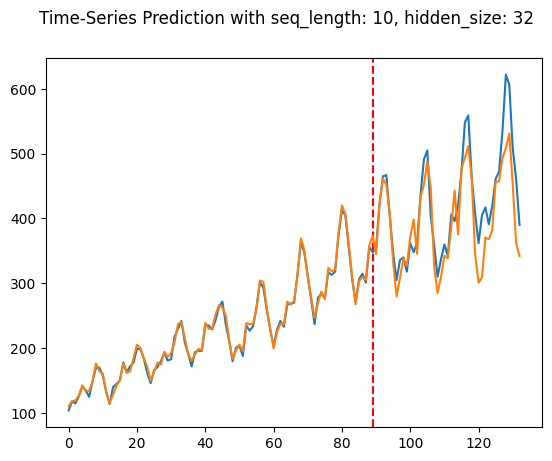

seq_length: 15, hidden_size: 4
Epoch: 0, loss: 0.13231
Epoch: 100, loss: 0.00342
Epoch: 200, loss: 0.00301
Epoch: 300, loss: 0.00238
Epoch: 400, loss: 0.00180
Epoch: 500, loss: 0.00163
Epoch: 600, loss: 0.00154
Epoch: 700, loss: 0.00152
Epoch: 800, loss: 0.00144
Epoch: 900, loss: 0.00149
Epoch: 1000, loss: 0.00142
Epoch: 1100, loss: 0.00137
Epoch: 1200, loss: 0.00152
Epoch: 1300, loss: 0.00139
Epoch: 1400, loss: 0.00134
Epoch: 1500, loss: 0.00130
Epoch: 1600, loss: 0.00127
Epoch: 1700, loss: 0.00125
Epoch: 1800, loss: 0.00126
Epoch: 1900, loss: 0.00145
MSE: 0.01111


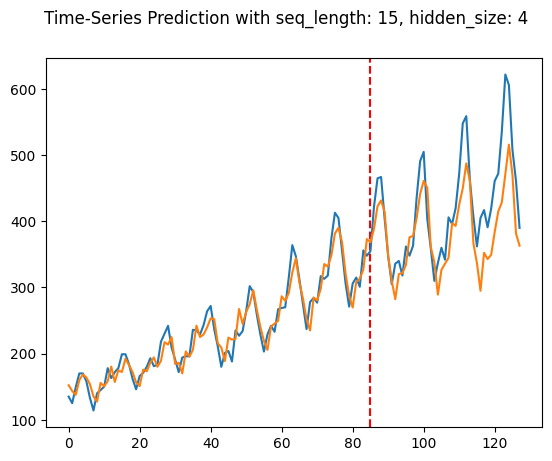

seq_length: 15, hidden_size: 8
Epoch: 0, loss: 0.01581
Epoch: 100, loss: 0.00311
Epoch: 200, loss: 0.00166
Epoch: 300, loss: 0.00134
Epoch: 400, loss: 0.00115
Epoch: 500, loss: 0.00108
Epoch: 600, loss: 0.00096
Epoch: 700, loss: 0.00084
Epoch: 800, loss: 0.00071
Epoch: 900, loss: 0.00053
Epoch: 1000, loss: 0.00063
Epoch: 1100, loss: 0.00059
Epoch: 1200, loss: 0.00028
Epoch: 1300, loss: 0.00023
Epoch: 1400, loss: 0.00021
Epoch: 1500, loss: 0.00021
Epoch: 1600, loss: 0.00017
Epoch: 1700, loss: 0.00015
Epoch: 1800, loss: 0.00016
Epoch: 1900, loss: 0.00022
MSE: 0.06687


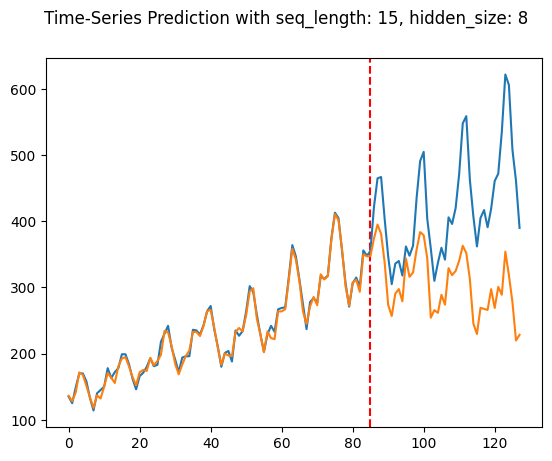

seq_length: 15, hidden_size: 16
Epoch: 0, loss: 0.25311
Epoch: 100, loss: 0.00376
Epoch: 200, loss: 0.00329
Epoch: 300, loss: 0.00256
Epoch: 400, loss: 0.00176
Epoch: 500, loss: 0.00138
Epoch: 600, loss: 0.00128
Epoch: 700, loss: 0.00119
Epoch: 800, loss: 0.00141
Epoch: 900, loss: 0.00112
Epoch: 1000, loss: 0.00104
Epoch: 1100, loss: 0.00100
Epoch: 1200, loss: 0.00087
Epoch: 1300, loss: 0.00070
Epoch: 1400, loss: 0.00053
Epoch: 1500, loss: 0.00049
Epoch: 1600, loss: 0.00037
Epoch: 1700, loss: 0.00028
Epoch: 1800, loss: 0.00018
Epoch: 1900, loss: 0.00012
MSE: 0.01905


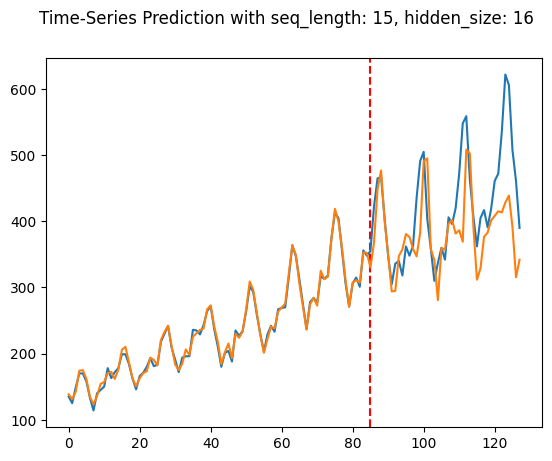

seq_length: 15, hidden_size: 32
Epoch: 0, loss: 0.03359
Epoch: 100, loss: 0.00251
Epoch: 200, loss: 0.00151
Epoch: 300, loss: 0.00111
Epoch: 400, loss: 0.00081
Epoch: 500, loss: 0.00052
Epoch: 600, loss: 0.00036
Epoch: 700, loss: 0.00027
Epoch: 800, loss: 0.00029
Epoch: 900, loss: 0.00020
Epoch: 1000, loss: 0.00023
Epoch: 1100, loss: 0.00014
Epoch: 1200, loss: 0.00024
Epoch: 1300, loss: 0.00016
Epoch: 1400, loss: 0.00008
Epoch: 1500, loss: 0.00005
Epoch: 1600, loss: 0.00001
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00000
Epoch: 1900, loss: 0.00000
MSE: 0.02088


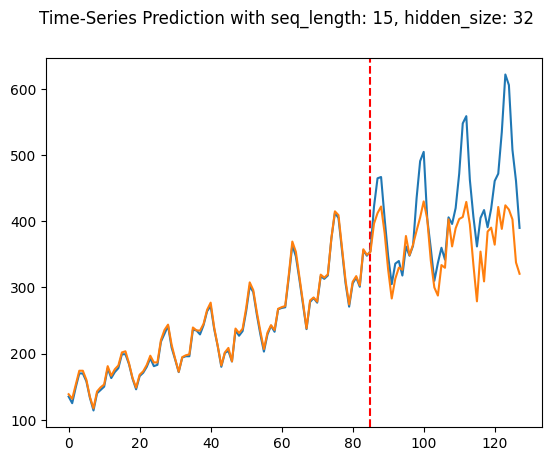

seq_length: 20, hidden_size: 4
Epoch: 0, loss: 0.39123
Epoch: 100, loss: 0.00641
Epoch: 200, loss: 0.00344
Epoch: 300, loss: 0.00304
Epoch: 400, loss: 0.00271
Epoch: 500, loss: 0.00243
Epoch: 600, loss: 0.00223
Epoch: 700, loss: 0.00209
Epoch: 800, loss: 0.00200
Epoch: 900, loss: 0.00193
Epoch: 1000, loss: 0.00188
Epoch: 1100, loss: 0.00182
Epoch: 1200, loss: 0.00167
Epoch: 1300, loss: 0.00121
Epoch: 1400, loss: 0.00096
Epoch: 1500, loss: 0.00090
Epoch: 1600, loss: 0.00086
Epoch: 1700, loss: 0.00085
Epoch: 1800, loss: 0.00078
Epoch: 1900, loss: 0.00073
MSE: 0.01782


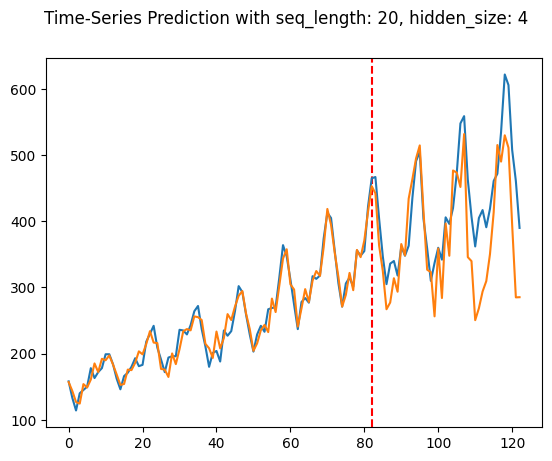

seq_length: 20, hidden_size: 8
Epoch: 0, loss: 0.02151
Epoch: 100, loss: 0.00232
Epoch: 200, loss: 0.00183
Epoch: 300, loss: 0.00080
Epoch: 400, loss: 0.00070
Epoch: 500, loss: 0.00065
Epoch: 600, loss: 0.00062
Epoch: 700, loss: 0.00066
Epoch: 800, loss: 0.00047
Epoch: 900, loss: 0.00040
Epoch: 1000, loss: 0.00031
Epoch: 1100, loss: 0.00025
Epoch: 1200, loss: 0.00023
Epoch: 1300, loss: 0.00022
Epoch: 1400, loss: 0.00022
Epoch: 1500, loss: 0.00021
Epoch: 1600, loss: 0.00020
Epoch: 1700, loss: 0.00018
Epoch: 1800, loss: 0.00016
Epoch: 1900, loss: 0.00013
MSE: 0.01257


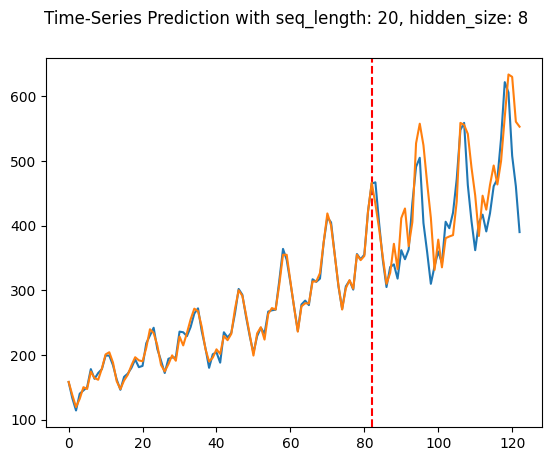

seq_length: 20, hidden_size: 16
Epoch: 0, loss: 0.04129
Epoch: 100, loss: 0.00311
Epoch: 200, loss: 0.00119
Epoch: 300, loss: 0.00072
Epoch: 400, loss: 0.00043
Epoch: 500, loss: 0.00029
Epoch: 600, loss: 0.00030
Epoch: 700, loss: 0.00023
Epoch: 800, loss: 0.00019
Epoch: 900, loss: 0.00016
Epoch: 1000, loss: 0.00011
Epoch: 1100, loss: 0.00012
Epoch: 1200, loss: 0.00008
Epoch: 1300, loss: 0.00007
Epoch: 1400, loss: 0.00007
Epoch: 1500, loss: 0.00008
Epoch: 1600, loss: 0.00005
Epoch: 1700, loss: 0.00005
Epoch: 1800, loss: 0.00003
Epoch: 1900, loss: 0.00005
MSE: 0.00512


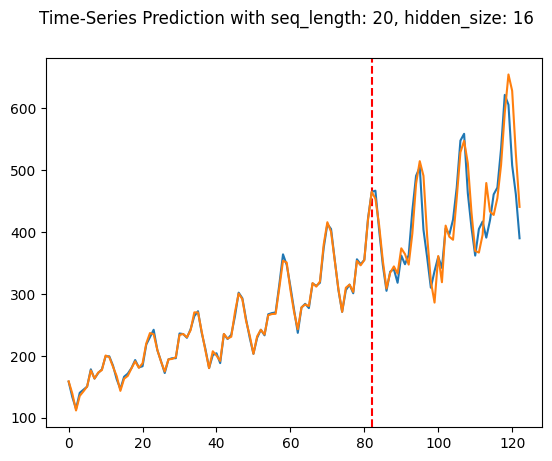

seq_length: 20, hidden_size: 32
Epoch: 0, loss: 0.14941
Epoch: 100, loss: 0.00365
Epoch: 200, loss: 0.00242
Epoch: 300, loss: 0.00136
Epoch: 400, loss: 0.00118
Epoch: 500, loss: 0.00088
Epoch: 600, loss: 0.00048
Epoch: 700, loss: 0.00030
Epoch: 800, loss: 0.00029
Epoch: 900, loss: 0.00024
Epoch: 1000, loss: 0.00022
Epoch: 1100, loss: 0.00022
Epoch: 1200, loss: 0.00015
Epoch: 1300, loss: 0.00016
Epoch: 1400, loss: 0.00010
Epoch: 1500, loss: 0.00008
Epoch: 1600, loss: 0.00015
Epoch: 1700, loss: 0.00006
Epoch: 1800, loss: 0.00009
Epoch: 1900, loss: 0.00005
MSE: 0.01048


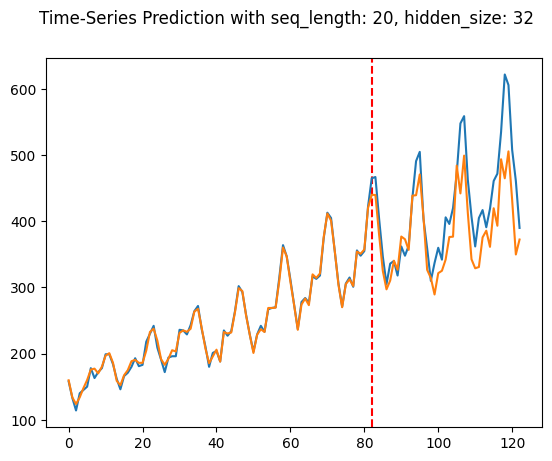

seq_length: 25, hidden_size: 4
Epoch: 0, loss: 0.51732
Epoch: 100, loss: 0.01308
Epoch: 200, loss: 0.00475
Epoch: 300, loss: 0.00449
Epoch: 400, loss: 0.00419
Epoch: 500, loss: 0.00379
Epoch: 600, loss: 0.00313
Epoch: 700, loss: 0.00190
Epoch: 800, loss: 0.00193
Epoch: 900, loss: 0.00156
Epoch: 1000, loss: 0.00136
Epoch: 1100, loss: 0.00112
Epoch: 1200, loss: 0.00084
Epoch: 1300, loss: 0.00076
Epoch: 1400, loss: 0.00072
Epoch: 1500, loss: 0.00070
Epoch: 1600, loss: 0.00067
Epoch: 1700, loss: 0.00061
Epoch: 1800, loss: 0.00054
Epoch: 1900, loss: 0.00051
MSE: 0.00693


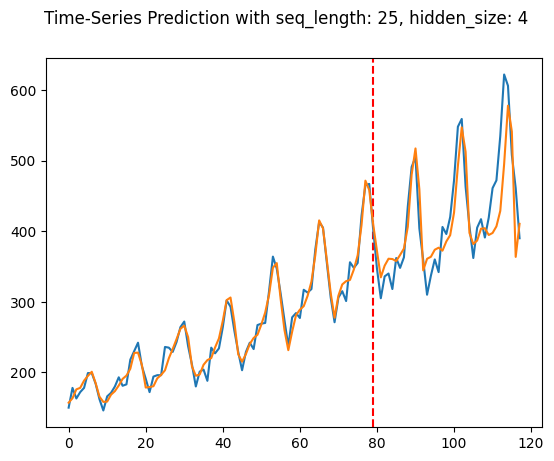

seq_length: 25, hidden_size: 8
Epoch: 0, loss: 0.04119
Epoch: 100, loss: 0.00410
Epoch: 200, loss: 0.00286
Epoch: 300, loss: 0.00232
Epoch: 400, loss: 0.00199
Epoch: 500, loss: 0.00196
Epoch: 600, loss: 0.00157
Epoch: 700, loss: 0.00137
Epoch: 800, loss: 0.00120
Epoch: 900, loss: 0.00099
Epoch: 1000, loss: 0.00064
Epoch: 1100, loss: 0.00076
Epoch: 1200, loss: 0.00046
Epoch: 1300, loss: 0.00048
Epoch: 1400, loss: 0.00036
Epoch: 1500, loss: 0.00033
Epoch: 1600, loss: 0.00033
Epoch: 1700, loss: 0.00030
Epoch: 1800, loss: 0.00060
Epoch: 1900, loss: 0.00022
MSE: 0.00900


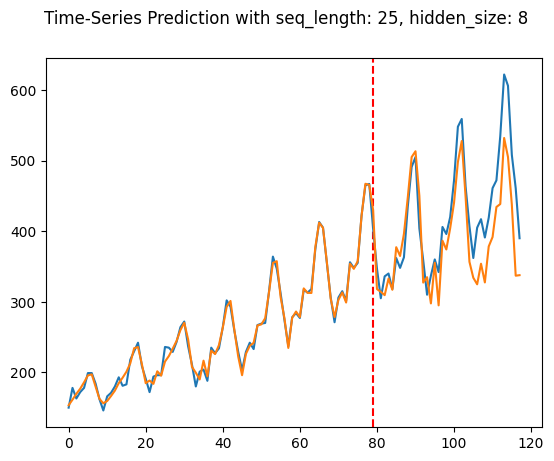

seq_length: 25, hidden_size: 16
Epoch: 0, loss: 0.09739
Epoch: 100, loss: 0.00365
Epoch: 200, loss: 0.00159
Epoch: 300, loss: 0.00080
Epoch: 400, loss: 0.00072
Epoch: 500, loss: 0.00068
Epoch: 600, loss: 0.00068
Epoch: 700, loss: 0.00051
Epoch: 800, loss: 0.00031
Epoch: 900, loss: 0.00021
Epoch: 1000, loss: 0.00016
Epoch: 1100, loss: 0.00011
Epoch: 1200, loss: 0.00012
Epoch: 1300, loss: 0.00026
Epoch: 1400, loss: 0.00007
Epoch: 1500, loss: 0.00006
Epoch: 1600, loss: 0.00011
Epoch: 1700, loss: 0.00005
Epoch: 1800, loss: 0.00007
Epoch: 1900, loss: 0.00004
MSE: 0.00658


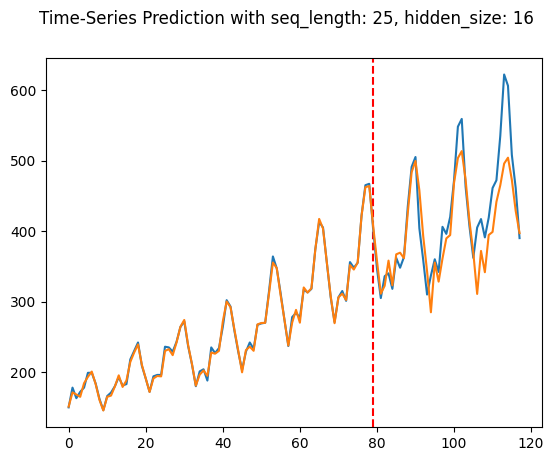

seq_length: 25, hidden_size: 32
Epoch: 0, loss: 0.18671
Epoch: 100, loss: 0.00412
Epoch: 200, loss: 0.00212
Epoch: 300, loss: 0.00173
Epoch: 400, loss: 0.00099
Epoch: 500, loss: 0.00062
Epoch: 600, loss: 0.00038
Epoch: 700, loss: 0.00031
Epoch: 800, loss: 0.00026
Epoch: 900, loss: 0.00023
Epoch: 1000, loss: 0.00021
Epoch: 1100, loss: 0.00012
Epoch: 1200, loss: 0.00008
Epoch: 1300, loss: 0.00008
Epoch: 1400, loss: 0.00005
Epoch: 1500, loss: 0.00004
Epoch: 1600, loss: 0.00004
Epoch: 1700, loss: 0.00006
Epoch: 1800, loss: 0.00006
Epoch: 1900, loss: 0.00003
MSE: 0.00717


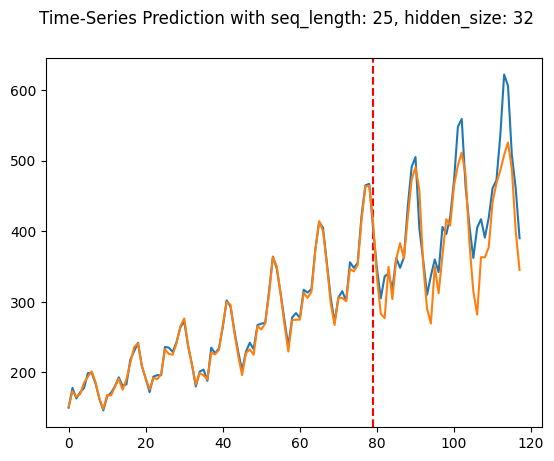

min loss = 0.005116031039506197, min vals = (20, 16)


In [11]:
# import grid search 
from sklearn.model_selection import GridSearchCV
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

sequence_length = [10, 15, 20, 25]
hidden_sizes = [4, 8, 16, 32]
min_loss = np.inf
min_vals = (0, 0)

for seq_length in sequence_length:
    for hidden_size in hidden_sizes:
        print("seq_length: %d, hidden_size: %d" % (seq_length, hidden_size))
        x, y = sliding_windows(training_data, seq_length)

        train_size = int(len(y) * 0.67)
        test_size = len(y) - train_size

        dataX = Variable(torch.Tensor(np.array(x)))
        dataY = Variable(torch.Tensor(np.array(y)))

        trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
        trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

        testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
        testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
        lstm = LSTM(num_classes, input_size, hidden_size, num_layers)
        criterion = torch.nn.MSELoss()
        optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
        train(criterion, optimizer, lstm, num_epochs)
        lstm.eval()
        train_predict = lstm(dataX)

        data_predict = train_predict.data.numpy()
        # get loss for test 
        loss = criterion(lstm(testX), testY)
        if loss < min_loss:
            min_loss = loss
            min_vals = (seq_length, hidden_size)
        print("MSE: %1.5f" % loss.item())
        dataY_plot = dataY.data.numpy()

        data_predict = sc.inverse_transform(data_predict)
        dataY_plot = sc.inverse_transform(dataY_plot)

        #Plot the Predictions
        plt.axvline(x=train_size, c='r', linestyle='--')

        plt.plot(dataY_plot)
        plt.plot(data_predict)
        plt.suptitle('Time-Series Prediction with seq_length: %d, hidden_size: %d' % (seq_length, hidden_size))
        plt.show()
        
        
print(f"min loss = {min_loss}, min vals = {min_vals}")
